# Hate speech identification

Dataset from https://github.com/t-davidson/hate-speech-and-offensive-language

In [8]:
%matplotlib inline  
import matplotlib

import seaborn as sns

import pandas as pd
import numpy as np

df = pd.read_csv('twitter-hate-speech-new.csv', index_col=0)

df.head(n=10)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import preprocess_string
from scipy.sparse import hstack, csr_matrix

char_trigrams = TfidfVectorizer(min_df=25, max_df=0.75, strip_accents='ascii', analyzer='char', ngram_range=(3, 3),
                                sublinear_tf=True)

word_unigrams = TfidfVectorizer(min_df=25, max_df=0.75, strip_accents='unicode', analyzer='word',
                                tokenizer=preprocess_string, sublinear_tf=True, stop_words='english')

X = hstack((
    char_trigrams.fit_transform(df['tweet'].values),
    word_unigrams.fit_transform(df['tweet'].values)
))

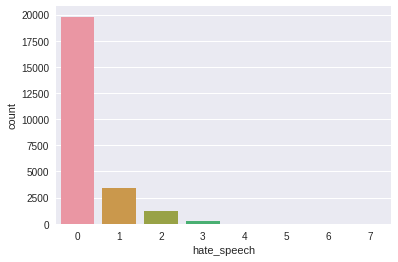

In [32]:
ax = sns.countplot(x=df['hate_speech'])

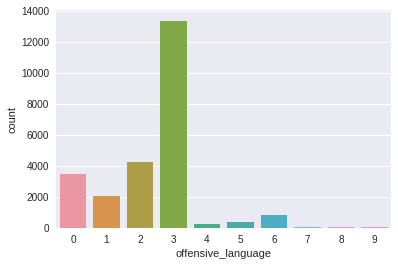

In [33]:
ax = sns.countplot(x=df['offensive_language'])

In [34]:
y_hate = (df['hate_speech'] > 1).values
y_offensive = (df['offensive_language'] > 1).values

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(C=0.25), X, y_hate, cv=5)
print("Score [is_hate]: {:.4f} (+/- {:.4f})".format(scores.mean(), scores.std()))

scores = cross_val_score(LogisticRegression(C=0.25), X, y_offensive, cv=5)
print("Score [is_offensive]: {:.4f} (+/- {:.4f})".format(scores.mean(), scores.std()))

Score [is_hate]: 0.9385 (+/- 0.0019)
Score [is_offensive]: 0.8983 (+/- 0.0130)
